# Datasets & DataLoaders

## Fashion-MNIST Dataset

### Load Datasets

This is an example of a dataset that is available from `torchvision`. The `Fashion-MNIST` dataset includes Zalando's article image. It consists of 60,000 training examples and 10,000 test examples. Each example comprises a 28x28 grayscale image and an associated label from one of 10 classes.

`Fashion-MNIST`  Parameters:
- `root`: path where the train/test data is stored
- `train`: specifies training or test dataset
- `download`: downloads the data from the internet if `download` else loads it from `root`
- `transform`, `target_transform`: feature and label transformations

In [4]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [5]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=False,
    transform=ToTensor()
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=False,
    transform=ToTensor()
)

### Iterate and Visualize the Dataset

We can index `Datasets` using an array-like syntax. 
We can also use `matplotlib` to visualize some samples in our training data.

In [10]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

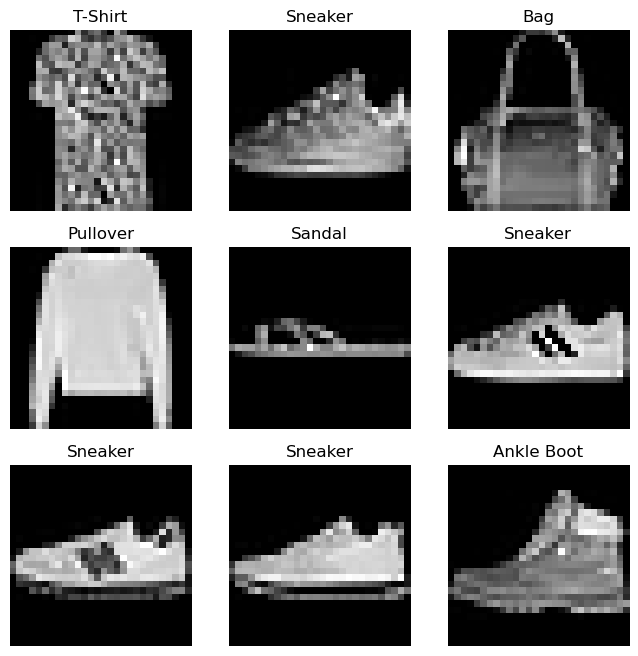

In [18]:
figure = plt.figure(figsize=(8, 8))
cols, rows= 3,3
for i in range(1, cols * rows +1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(),cmap="gray")
plt.show()

## Create a Custom Dataset

We should at least implement the `__init__`, `__len__`, and `__getitem__` methods in order to create a custom dataset. 

Our custom dataset should inherit `torch.utils.data.Dataset` and override `__init__`, `__len__`, and `__getitem__`.

In [23]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    def __len__(self):
        return len(self.img_labels)
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

## `DataLoader`

### Prepare Training Data

While `Dataset` retrieves the features and labels of a single sample, `DataLoader` is responsible for creating an iterable over the dataset. It has a benefit of passing samples in `minibatches` to the network and reshuffling the data at every epoch to reduce model overfitting. 

In [24]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

### Iterate through the `DataLoader`

We can retrieve batches of data from the `DataLoader`. Each iteration provides a batch of `train_features` and `train_labels`.

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


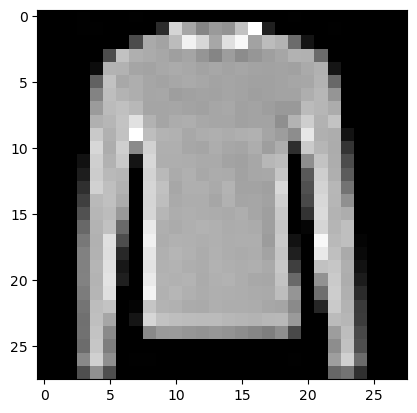

Label: 2


In [42]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")